Customer Relationship Management (CRM) is a key element of modern marketing strategies. 

The KDD Cup 2009 challenge offers the opportunity to work on large marketing databases from the French Telecom company Orange to predict the propensity of customers to switch provider (churn), buy new products or services (appetency), or buy upgrades or add-ons proposed to them to make the sale more profitable (up-selling).

The challenge is to beat the in-house system developed by Orange Labs.

It is an opportunity to prove that you can deal with a very large database, including heterogeneous noisy data (numerical and categorical variables), and unbalanced class distributions

## Task

The task is to estimate the churn, appetency and up-selling probability of customers.

* Churn: Churn rate is also sometimes called attrition rate. It is one of two primary factors that determine the steady-state level of customers a business will support. In its broadest sense, churn rate is a measure of the number of individuals or items moving into or out of a collection over a specific period of time. The term is used in many contexts, but is most widely applied in business with respect to a contractual customer base. For instance, it is an important factor for any business with a subscriber-based service model, including mobile telephone networks and pay TV operators. The term is also used to refer to participant turnover in peer-to-peer networks.
* Appetency: In our context, the appetency is the propensity to buy a service or a product.
* Up-selling: Up-selling is a sales technique whereby a salesman attempts to have the customer purchase more expensive items, upgrades, or other add-ons in an attempt to make a more profitable sale. Up-selling usually involves marketing more profitable services or products, but up-selling can also be simply exposing the customer to other options he or she may not have considered previously. Up-selling can imply selling something additional, or selling something that is more profitable or otherwise preferable for the seller instead of the original sale.

The data contains two parts training and test set. Both the sets contain 50,000 instances with numerical and categorical variables. In the dataset, the first 190 variables are numerical and the last 40 are categorical.  

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [27]:
train = pd.read_csv('orange_small_train.data', sep='\t')
test = pd.read_csv('orange_small_test.data', sep='\t')

train['churn'] = pd.read_csv('orange_small_train_churn.labels',header=None)
train['appetency'] = pd.read_csv('orange_small_train_appetency.labels',header=None)
train['upselling'] = pd.read_csv('orange_small_train_upselling.labels',header=None)

In [28]:
train.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var224,Var225,Var226,Var227,Var228,Var229,Var230,churn,appetency,upselling
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN,-1,-1,-1
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN,1,-1,-1
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN,-1,-1,-1
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN,-1,-1,-1
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN,-1,-1,-1


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 233 entries, Var1 to upselling
dtypes: float64(191), int64(4), object(38)
memory usage: 88.9+ MB


In [30]:
train.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var186,Var187,Var188,Var189,Var190,Var209,Var230,churn,appetency,upselling
count,702.000000,1241.000000,1240.000000,1579.000000,1.487000e+03,44471.000000,44461.000000,0.0,702.000000,1.487000e+03,...,702.000000,702.00000,1241.000000,21022.000000,333.000000,0.0,0.0,50000.00000,50000.00000,50000.000000
mean,11.487179,0.004029,425.298387,0.125396,2.387933e+05,1326.437116,6.809496,NaN,48.145299,3.926057e+05,...,3.299145,16.54416,167.368477,270.142137,22007.045192,NaN,NaN,-0.85312,-0.96440,-0.852720
std,40.709951,0.141933,4270.193518,1.275481,6.441259e+05,2685.693668,6.326053,NaN,154.777855,9.280896e+05,...,8.781967,60.22303,113.980072,86.707692,29085.146490,NaN,NaN,0.52172,0.26445,0.522373
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,...,0.000000,0.00000,-6.420000,6.000000,0.000000,NaN,NaN,-1.00000,-1.00000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,4.000000,0.000000e+00,...,0.000000,0.00000,19.380000,204.000000,2732.670000,NaN,NaN,-1.00000,-1.00000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,861.000000,7.000000,NaN,20.000000,0.000000e+00,...,0.000000,4.00000,197.640000,270.000000,12668.940000,NaN,NaN,-1.00000,-1.00000,-1.000000
75%,16.000000,0.000000,0.000000,0.000000,1.187425e+05,1428.000000,7.000000,NaN,46.000000,2.628630e+05,...,6.000000,14.00000,252.960000,330.000000,29396.340000,NaN,NaN,-1.00000,-1.00000,-1.000000
max,680.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,140.000000,NaN,2300.000000,1.232559e+07,...,102.000000,910.00000,628.620000,642.000000,230427.000000,NaN,NaN,1.00000,1.00000,1.000000


### Checking for type of data set (balanced/ imbalanced)

In [31]:
train['churn'].value_counts()

-1    46328
 1     3672
Name: churn, dtype: int64

In [32]:
train['appetency'].value_counts()

-1    49110
 1      890
Name: appetency, dtype: int64

In [33]:
train['upselling'].value_counts()

-1    46318
 1     3682
Name: upselling, dtype: int64

The data set seems to be imbalanced data set with less positive (1) values for all three labels.

## Dealing with missing values

In [34]:
(train.isna().sum() == 50000).sum()

18

It seems there are `18` columns with all null values. Dropping those columns.

In [35]:
train.dropna(how='all', axis='columns', inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 215 entries, Var1 to upselling
dtypes: float64(173), int64(4), object(38)
memory usage: 82.0+ MB


In [36]:
# drop rows with all null values
train.dropna(how='all', inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Columns: 215 entries, Var1 to upselling
dtypes: float64(173), int64(4), object(38)
memory usage: 82.4+ MB


In [37]:
percent_missing = round(train.isnull().sum() * 100 / len(train), 1)
missing_value_columns = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing})

In [38]:
missing_value_columns.head(5)

,column_name,percent_missing
Var1,Var1,98.6
Var2,Var2,97.5
Var3,Var3,97.5
Var4,Var4,96.8
Var5,Var5,97.0


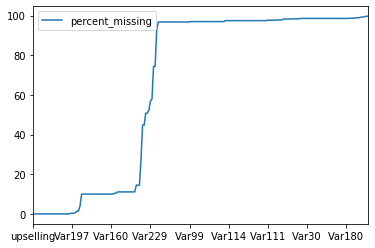

In [39]:
missing_value_columns.sort_values('percent_missing', inplace=True)
missing_value_columns.plot()
plt.show()

In [40]:
missing_value_columns_90 = missing_value_columns[missing_value_columns['percent_missing'] > 90]
missing_value_columns_90.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, Var51 to Var118
Data columns (total 2 columns):
column_name        136 non-null object
percent_missing    136 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


There are 136 columns with more than 90% data that is missing

In [41]:
thresh = len(train) * 0.1
train = train.dropna(thresh = thresh, axis = 1)
len(train.columns)

79

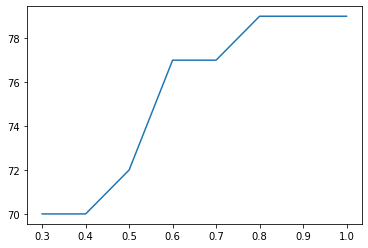

In [42]:
threshold = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3]
cols = []

for i in threshold:
    relevant_col = train.isnull().mean() < i
    cols.append(relevant_col.sum())

plt.plot(threshold, cols)
plt.show()

There are 9 columns (79-70) that have more than 70% data missing. We can drop those columns. 

In [43]:
thresh = len(train) * 0.7
train = train.dropna(thresh = thresh, axis = 1)
len(train.columns)

70

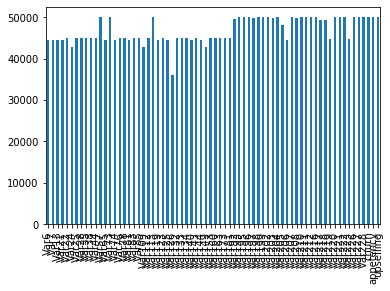

In [44]:
train.count().plot(kind = 'bar')
plt.show()

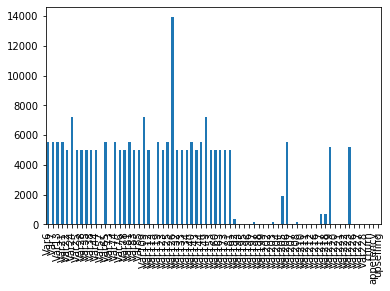

In [45]:
train.isna().sum().plot(kind = 'bar')
plt.show()

In [46]:
train['churn'] = (train['churn'] + 1)/2
train['appetency'] = (train['appetency'] + 1)/2
train['upselling'] = (train['upselling'] + 1)/2

In [47]:
train.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var220,Var221,Var222,Var223,Var226,Var227,Var228,churn,appetency,upselling
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,...,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,xb3V,RAYp,F2FyR07IdsN7I,0.0,0.0,0.0
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,...,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,fKCe,RAYp,F2FyR07IdsN7I,1.0,0.0,0.0
2,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,...,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,Qu4f,02N6s8f,ib5G6X1eUxUn6,0.0,0.0,0.0
3,NaN,0.0,0.0,NaN,0.0,NaN,0.0,22.08,0.0,0.0,...,L91KIiz,oslk,CE7uk3u,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I,0.0,0.0,0.0
4,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,...,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I,0.0,0.0,0.0


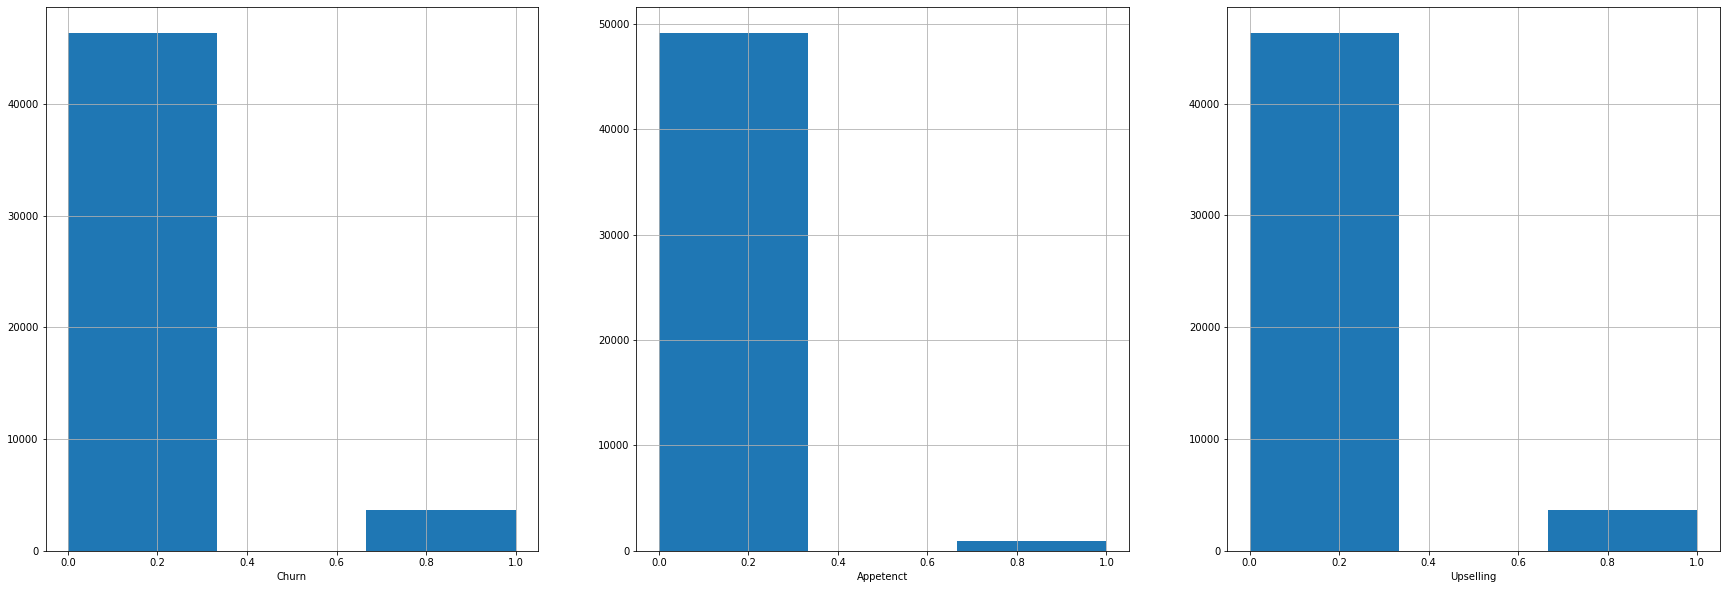

In [48]:
fig = plt.figure(figsize = (30, 10))

plt.subplot(131)
train['churn'].hist(bins = 3)
plt.xlabel('Churn')

plt.subplot(132)
train['appetency'].hist(bins = 3)
plt.xlabel('Appetenct')

plt.subplot(133)
train['upselling'].hist(bins = 3)
plt.xlabel('Upselling')

plt.show()